# Tensors

In [4]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [5]:
# Dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [6]:
# Labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

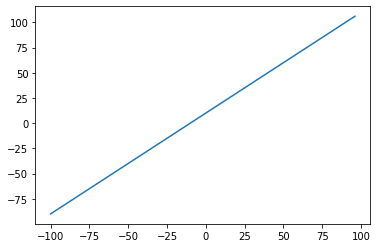

In [7]:
import matplotlib.pyplot as plt
plt.plot(X, y)

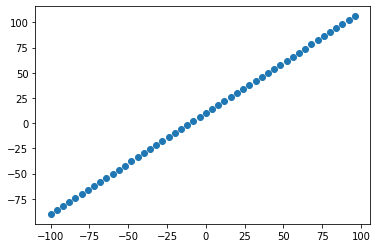

In [8]:
plt.scatter(X, y)

In [9]:
# Creating train / test datasets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [10]:
len(X_train), len(X_test)

(40, 10)

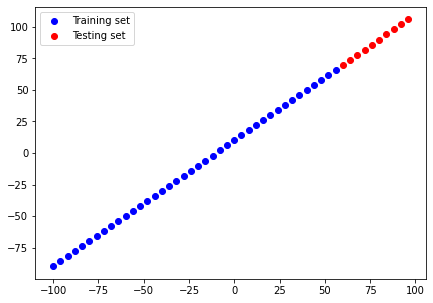

In [11]:
from cProfile import label


plt.figure(figsize=(7, 5))
# Plotting training data
plt.scatter(X_train, y_train, c="b", label="Training set")
# Plotting testing data
plt.scatter(X_test, y_test, c="r", label="Testing set")
# Show a legend
plt.legend()

In [12]:
# Creating NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 10.9255 - mae: 10.9255
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 11.1464 - mae: 11.1464
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4503 - mae: 9.4503
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1651 - mae: 10.1651
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 16.2370 - mae: 16.2370
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6513 - mae: 11.6513
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5631 - mae: 7.5631
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1918 - mae: 11.1918
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 7.9782 - mae: 7.9782
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 12.4991 - mae: 12.4991
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - lo

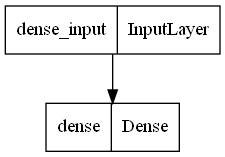

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

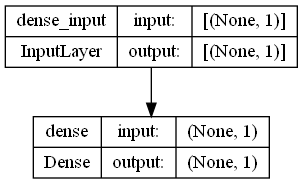

In [16]:
plot_model(model=model, show_shapes=True)

In [17]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 204ms/step


array([[54.856712],
       [58.42212 ],
       [61.987526],
       [65.55293 ],
       [69.11834 ],
       [72.68375 ],
       [76.249146],
       [79.81455 ],
       [83.37996 ],
       [86.945366]], dtype=float32)

In [18]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [19]:
# Function to visualise the outcomes of ML training, testing and predictions
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize=(7, 5))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

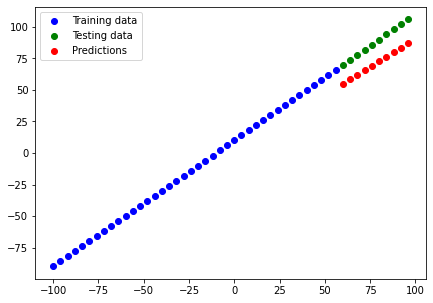

In [20]:
plot_predictions()

# Model Evaluation

In [21]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 341ms/step - loss: 17.0990 - mae: 17.0990


[17.09895896911621, 17.09895896911621]

In [22]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

# INCORRECT VALUE IS CAUSED BY DIFFERENCES IN TENSOR SHAPES

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.143288, 29.57788 , 26.012476, 22.447067, 18.88166 , 15.853003,
       13.450513, 11.674179, 10.524008, 10.      ], dtype=float32)>

In [23]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([54.856712, 58.42212 , 61.987526, 65.55293 , 69.11834 , 72.68375 ,
       76.249146, 79.81455 , 83.37996 , 86.945366], dtype=float32)>

In [24]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=17.098959>

In [25]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=293.93262>

# Comparing 3 models with various params

## Model 1

In [26]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


In [27]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 92.3871 - mae: 92.3871
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 57.0508 - mae: 57.0508
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 23.9767 - mae: 23.9767
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 9.7350 - mae: 9.7350
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3829 - mae: 12.3829
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2991 - mae: 11.2991
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5889 - mae: 8.5889
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 12.3488 - mae: 12.3488
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 15.1956 - mae: 15.1956
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5841 - mae: 13.5841
Epoch 11/100
2/2 [==============================] - 0s 0s/step - l

1/1 [==============================] - 0s 81ms/step


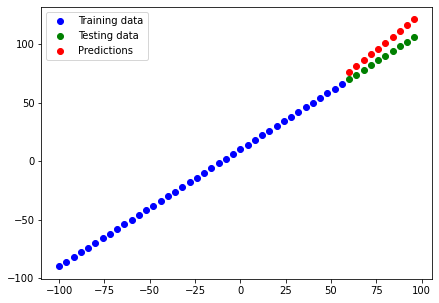

In [29]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [30]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=10.674746>,
 <tf.Tensor: shape=(), dtype=float32, numpy=122.08562>)

## Model 2

In [31]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [32]:
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 24.2296 - mae: 24.2296
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 30.4061 - mae: 30.4061
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 23.3057 - mae: 23.3057
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 32.0342 - mae: 32.0342
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 17.2850 - mae: 17.2850
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3507 - mae: 10.3507
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 17.8404 - mae: 17.8404
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8211 - mae: 11.8211
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 26.9649 - mae: 26.9649
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2425 - mae: 10.2425
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 67ms/step


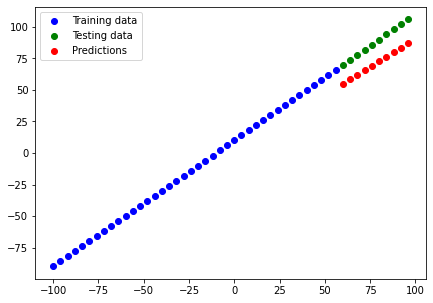

In [33]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [34]:
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.11105>,
 <tf.Tensor: shape=(), dtype=float32, numpy=294.4297>)

## Model 3

In [35]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [36]:
model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 12ms/step - loss: 15.4628 - mae: 15.4628
Epoch 2/200
2/2 [==============================] - 0s 0s/step - loss: 33.3384 - mae: 33.3384
Epoch 3/200
2/2 [==============================] - 0s 0s/step - loss: 19.4227 - mae: 19.4227
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 29.8643 - mae: 29.8643
Epoch 5/200
2/2 [==============================] - 0s 0s/step - loss: 10.7738 - mae: 10.7738
Epoch 6/200
2/2 [==============================] - 0s 0s/step - loss: 16.2606 - mae: 16.2606
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 12.7705 - mae: 12.7705
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 17.7416 - mae: 17.7416
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 11.4622 - mae: 11.4622
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 11.4289 - mae: 11.4289
Epoch 11/200
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 81ms/step


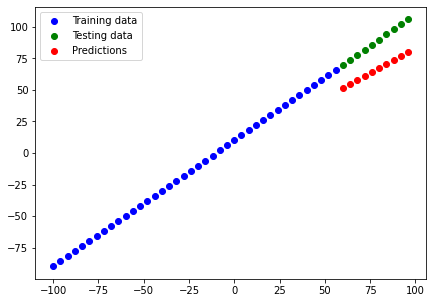

In [37]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [38]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=22.138378>,
 <tf.Tensor: shape=(), dtype=float32, numpy=495.10507>)

## Comparing results of 3 experiments

In [40]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,10.674746,122.085617
1,model_2,17.111050,294.429688
2,model_3,22.138378,495.105072
